<a href="https://colab.research.google.com/github/luizftoledo/FOIA-scrapers-in-Brazil/blob/main/Raspador_de_pedidos_negados_com_base_no_artigo_31_da_Lei_de_Acesso_%C3%A0_Informa%C3%A7%C3%A3o_(informa%C3%A7%C3%A3o_pessoal_%7C_%22at%C3%A9_100_anos_de_sigilo%22)_Fonte_Fiquem_Sabendo%2C_com_base_em_dados_da_CGU_Governo_Federal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 100 anos de sigilo: raspador de pedidos negados

### Por: Luiz Fernando Toledo / Fiquem Sabendo

Esta análise de dados baixa e cria ma planilha automaticamente com todos os pedidos de informação feitos ao governo federal e negados **com base no artigo 31 da Lei de Acesso à Informação**, também conhecido como `negativa por conter informação pessoal`. Este tipo de negativa ficou conhecida como `100 anos de sigilo`, já que este é o prazo previsto na [lei](https://www.jusbrasil.com.br/busca?q=art.+31+da+lei+12527%2F11#:~:text=31.,%C3%A0s%20liberdades%20e%20garantias%20individuais.) para liberar informações deste tipo.

### Metodologia

Base de dados utilizada: [CGU](http://www.consultaesic.cgu.gov.br/busca/_layouts/15/DownloadPedidos/DownloadDados.aspx), Controladoria-Geral da União, o órgão responsável por monitorar o cumprimento da LAI no Brasil. A base de dados contém todos os pedidos de informação registrados por meio da LAI de 2015 a 2022 ao governo federal.


In [1]:
!pip install wget
import wget
import pandas as pd
import time
from datetime import date
import datetime
import ssl
import pandas as pd

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=effb452260086acd0f46105a8d3e12c7897d2196409952b1d592e3ab22ae41f0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
pedidos2022 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2022.zip'
pedidos2021 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2021.zip'
pedidos2020 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2020.zip'
pedidos2019 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2019.zip'
pedidos2018 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2018.zip'
pedidos2017 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2017.zip'
pedidos2016 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2016.zip'
pedidos2015 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2015.zip'



wget.download(pedidos2022)
wget.download(pedidos2021)
wget.download(pedidos2020)
wget.download(pedidos2019)
wget.download(pedidos2018)
wget.download(pedidos2017)
wget.download(pedidos2016)
wget.download(pedidos2015)

# importing required modules
from zipfile import ZipFile
  

for i in range(2015, 2023):
  # specifying the zip file name
  file_name = f"Arquivos_csv_{i}.zip"
    
  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as zip:
      # printing all the contents of the zip file
      zip.printdir()
      
      # extracting all the files
      print('Extracting all the files now...')
      zip.extractall()
      print('Done!')



File Name                                             Modified             Size
20221001_Pedidos_csv_2015.csv                  2022-10-01 03:03:40    244909454
20221001_Recursos_csv_2015.csv                 2022-10-01 03:08:14     36239096
20221001_Solicitantes_csv_2015.csv             2022-10-01 03:08:52      7188118
Extracting all the files now...
Done!
File Name                                             Modified             Size
20221001_Pedidos_csv_2016.csv                  2022-10-01 03:14:40    287978162
20221001_Recursos_csv_2016.csv                 2022-10-01 03:20:06     43770166
20221001_Solicitantes_csv_2016.csv             2022-10-01 03:20:46      7924576
Extracting all the files now...
Done!
File Name                                             Modified             Size
20221001_Pedidos_csv_2017.csv                  2022-10-01 03:26:58    305821462
20221001_Recursos_csv_2017.csv                 2022-10-01 03:32:56     51412990
20221001_Solicitantes_csv_2017.csv          

In [3]:
# baixando os 8 anos e juntando em um arquivo só 


textos_2015 = pd.read_csv("20221001_Pedidos_csv_2015.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')

textos_2016 = pd.read_csv("20221001_Pedidos_csv_2016.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2017 = pd.read_csv("20221001_Pedidos_csv_2017.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2018 = pd.read_csv("20221001_Pedidos_csv_2018.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2019 = pd.read_csv("20221001_Pedidos_csv_2019.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')


textos_2020 = pd.read_csv("20221001_Pedidos_csv_2020.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')

textos_2021 = pd.read_csv("20221001_Pedidos_csv_2021.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')


textos_2022 = pd.read_csv("20221001_Pedidos_csv_2022.csv",sep=";",
                          header = None, 
                        names=['id', 
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')

texto_pedidos = pd.concat([textos_2015, textos_2016, textos_2017, textos_2018, textos_2019, textos_2020, textos_2021, textos_2022])

texto_pedidos = texto_pedidos.rename(columns={'sub_assunto': 'ano_pedido'})

In [5]:
# arrumando a coluna da data

texto_pedidos.data_pedido = pd.to_datetime(texto_pedidos.data_pedido, errors='coerce')
texto_pedidos['ano_pedido'] = pd.DatetimeIndex(texto_pedidos['data_pedido']).year



In [6]:
pessoais = texto_pedidos[texto_pedidos.motivo_decisao == 'Dados pessoais']
pessoais.to_csv('pessoais.csv', index=False)

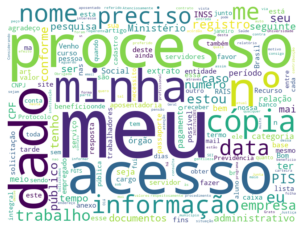

In [14]:
# nuvem de palavras do texto dos pedidos

# importações para fazer a nuvem de palavras dos textos de pedidos negados
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# montando a nuvem
text = " ".join(pedido for pedido in pessoais.texto_pedido)
word_cloud = WordCloud(stopwords=['nos', 'qual', 'saber', 'desde', 'número', 'anos', 'direito', 'as', 'Prezados', 'das', 'ano', 'referente', 'Federal', 'nos', 'sistema',\
                                  'documento', 'pedido', 'qual', 'conforme'\
                                  'informação', 'Estado', 'até', 'já', 'todos', 'dia', 'informações',\
                                  'Obrigado', 'PI', 'todo', 'Lei', 'sobre', 'Boa', 'ou', 'foi', 'pois', 'sobre',\
                                  'à', 'foi', 'aos', 'se', 'é', 'uma', 'um', 'pela', 'solicitar', 'Prezado', 'por',\
                                  'na', 'os', 'como', 'Gostaria', 'ao', 'solicito', 'Solicito', 'com', 'dos', 'na'\
                                  'com', 'pelo', 'sou', 'não', 'de', 'o', 'e', 'a', 'no', 'do', 'que', 'da', 'em', 'para'], width=800, height=600, collocations = False, background_color = 'white').generate(text)



plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('nuvem_auxilio.png', dpi=1000)
plt.show()

In [15]:
# Planilha com pedidos negados por conter dados pessoais, de 2015 a 2022

pessoais.tail(1)

,id,protocolo,esfera,orgao,status,data_pedido,resumo,texto_pedido,data_registro,foi_prorrogado,...,forma_resposta,forma_pedido,numero,categoria_pedido,descricao_geral,quem_respondeu,ano_pedido,texto_resposta,decisao,motivo_decisao
51129,4884962,8198028325202212,Federal,DPF – Departamento de Polícia Federal,Concluída,2022-09-21,estado de RNE/impedimentos,Bom dia. Sou portugues e vivi no Brasil mas vi...,13/10/2022,Não,...,Pelo sistema (com avisos por email),Internet,4025609,Outros em Relações Internacionais,Informação no portal PF - Ausência,[Órgão Central/OC] DIREX/PF - DIRETORIA-EXECUTIVA,2022,"Prezado(a) Senhor(a) Segue, em anexo, a res...",Acesso Negado,Dados pessoais


In [16]:
# agora vamos jogar os dados no google spreadsheet. importar bibliotecas necessárias
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [17]:
# salvar arquivo em uma planilha google spreadsheet

#date
from datetime import date

today = date.today()

# create, and save df
from gspread_dataframe import set_with_dataframe
title = f'Atualizada em {today}. Negados com base no artigo 31 da LAI até agora. Fonte: Fiquem Sabendo/CGU'
gc.create(title)  # if not exist
sheet = gc.open(title).sheet1
set_with_dataframe(sheet, pessoais) 
# include_index=False, include_column_header=True, resize=False
sh = gc.open(f'Atualizada em {today}. Negados com base no artigo 31 da LAI até agora. Fonte: Fiquem Sabendo/CGU')


In [18]:
# link para o spreadsheet

link = sh.id
link_final = 'https://docs.google.com/spreadsheets/d/' + link
print(link_final)

https://docs.google.com/spreadsheets/d/1CU62h2ZHiOuSAnOHzBiMB9ri-MnQ5Eoaixr6aAlJwu0


In [28]:
# abrir o link
%%javascript

window.open('https://docs.google.com/spreadsheets/d/1CU62h2ZHiOuSAnOHzBiMB9ri-MnQ5Eoaixr6aAlJwu0', '_blank');

<IPython.core.display.Javascript object>